# Topic 12: Descriptive Analytics

_Descriptive Analytics_ attempts to describe or understand a dataset.  It does not attempt to determine the merits of a hypothesis, nor does it try to infer characteristics of the _population_.  Although it seems that the examples in the book _do_ attempt to draw some conclusions about the population!

Descriptive Analytics is based on two main concepts:

* A _population_ is a collection of objects about which information is sought;

* A _sample_ is a part of the population that is observed.

The assumption is that the data collected from the sample can infer what what we would find if we could collect data from the whole population.

The typical flow is:

* Data Preparation, where we collect the data and format the data so it is appropriate for analysis.  This usually involves obtaining the data, parsing the data, cleaning the data, and possibly build convenient data structures for storing the data.

* Descriptive Statistics, where we generate different statistics to describe and summarize the data concisely and evaluate different ways to visualize them.  There is usually a lot of exploration in this phase.

## Setting up Notebook

We typically build a new project, then set up the environment for the project, installing the tools and packages we will need.  For this lecture, we will use Jupyter Notebook, Pandas, Numpy, and MatPlotLib.  At the start of the notebook, we import the packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Example Data Set

For this lecture, we will consider a dataset that contains employement information of about 32,000 adults.  The book fetched this data from the UCI Machine Learning Repository.  The data contains the following parameters:

* Age
* Sex
* Marital Status
* Country
* Income (a boolean indicating whether the person makes more than $50K/year.
* Education (highest level of education achieved
* several additional values

The question the book seeks to answer is "Are men more likely to become high-income professionals than women?"

I've downloaded the file, it is included in the 'extra files' for Topic 12, so you can download the data, and this Notebook, so you can run this on your own computer.

The following cell will read the data into an array, called 'data'!

In [3]:
file = open('adult.data', 'r')

def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([chr_int(data1[0]), data1[1],
                    chr_int(data1[2]), data1[3],
                    chr_int(data1[4]), data1[5],
                    data1[6], data1[7], data1[8],
                    data1[9], chr_int(data1[10]),
                    chr_int(data1[11]), chr_int(data1[12]),
                    data1[13], data1[14]])

The data is in a CSV (comma separated values) file, which is a text file.  Each line of the file consists of a new record in the dataset.  The values are separated by commas (and a trailing space).  There are 15 values on each line.

The code reads the file, one line at a time.  The line is then split by ', ', so the line is divided into an array of tokens.  The code verifies that the line has 15 tokens.

The code then creates a new array containing the values, appending this array to the data array.  However, many of the columns contain numeric information, and it would be nice to have these values represented by integers in the program.  So the 'chr_int' function is provided, which will convert a string containing an integer into an integer.  You can see which columns are given this conversion.

The following will print one line of the data (from 1 inclusive to 2 exclusive!):

In [4]:
print(data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


Recalling that Python arrays are not very efficient, we will construct a Pandas DataFrame with this data.  To do this, we need to provide names for each of the columns.  Looking at the documentation for the dataset, the book decided upon the following names for each column.  These names are stored in an array, then the DataFrame is built.  Finally we 'print' the DataFrame, which will show the first few lines and the last few lines of the file.

In [5]:
colnames = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 'marital', 'occupation',
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income']

df = pd.DataFrame(data, columns = colnames)

df

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n


They next wanted to do a little exploratory investigation of the data.  They wanted to see how many people were from each country:

In [6]:
counts = df.groupby('country').size()

counts

country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua           

While we can see that there were many countries represented, we could also see that a very large percentage of the values came from the United States.

To begin the investigation, they divided the complete dataset into two subsets, the males and the females.  We will still have the original dataset in the 'df' DataFrame, but now we also have a DataFrame containing only the men, and another Dataframe containing only the women.

I was curious, I wanted to see how evenly these two groups were represented, so I asked for the size of the groups.  One quick way to see the size is to ask for the 'shape'.

In [7]:
male = df[df.sex == 'Male']
female = df[df.sex == 'Female']

In [8]:
male.shape

(21790, 15)

In [9]:
female.shape

(10771, 15)

Interesting, there are about twice as many men in the study as women.  We don't yet know how this might influence the outcome, but it is interesting to note.

The book went on to further divide the dataset.  They do these divisions so that it is easier later to run analytics on a particular group.  We don't have to do the filtering as part of the analytics, we just pick the subset to use!

The book built new DataFrames for males with high income and females with high income.  I just went crazy and made many DataFrames: all people with high income, all people with low income, males with high, males with low, females with high and females with low.

By the way, there is that one field indicating whether the person has an income greater than 50K or not.  So we don't have anymore granularity than that!

In [10]:
all_high = df[df.income == '>50K\n']
all_low = df[df.income != '>50K\n']
male_high = male[male.income == '>50K\n']
male_low = male[male.income != '>50K\n']
female_high = female[female.income == '>50K\n']
female_low = female[female.income != '>50K\n']

## Exploratory Data Analysis

We will perform a number of analyses on the sample data (this is sample data because we only have 32,000 entries, we didn't get an entry from _everybody_).  Each analysis will tell us a little information about the people in the sample.  The assumption is that these people _represent_ the whole population, so what information we glean here may approximately apply to the whole population as well.

In many cases, we are not looking at one particular overall result, but rather a _distribution_.  For example, in a bit we will be drawing a chart that shows how many people in the sample are of each age.  This chart will show the distribution of people among the ages.  This _sample distribution_ should give us an idea of what the _population distribution_ would be.

## Summarizing the Data

For the first example, they looked at the proportion of high-income people in the database.

* For all of the samples, what percentage had high-income?

* For just the men, what percentage had high-income?

* For just the women, what percentage had high-income?

In [11]:
def print_rate(label, subset, set):
    print(f'The rate of {label} is: {int(len(subset)/float(len(set))*100)}%.')
    
print_rate('people with high income', all_high, df)
print_rate('men with high income', male_high, male)
print_rate('women with high income', female_high, female)

The rate of people with high income is: 24%.
The rate of men with high income is: 30%.
The rate of women with high income is: 10%.


It is difficult to make strong convictions based on these preliminary results.  However, it does appear that the data shows that men are more likely to have a high-income than women.  But we will dig a bit deeper.

*__Aside__*

For this, and several of the upcoming cells, I changed their code a bit.  They did not define a function, but rather wrote out the formula for each set.  So they did a lot of writing!  But remember the _DRY_ principle: _Don't Repeat Yourself_.  By writing a function, I only had to write the formula one time, but then I could apply it many times!

In addition, if I wanted to change the formula a bit, maybe fix a bug, I would only have to change one version, rather than the old way where I would have to make the same fix to all three places where they used the formula.

The other thing I did was use the Python 'f-strings'.  This is a string with an 'f' prefix.  Within that string, any characters within {..} are Python code, such as a variable reference or an equation.

In future formulas, I will also add precision indicators, to truncate decimal values to just a couple of places to the right of the decimal point.  Its easier doing this once rather than many times.

*__Back to the book__*

## Sample Mean

What do I mean about 'mean'?  Do I think you shouldn't be kind?

One of the basic statistics about some data is to compute the _mean_.  The mean is simple the sum of all of the values divided by the number of values.

$$ \mu = \frac{1}{n} \sum_{i = 1}^{n} x_i $$

Many times we refer to this as the _average_, and in general usage, that is correct.  However, in statistics, 'average' is not strictly defined, and can mean several different values.  To avoid ambiguity, we will use the term 'mean'.

Pandas has a built-in function that computes the mean of a series.  In the following code, we use this function to compute the value.  Furthermore, in printing the value, we control the number of digits to be displayed afer decimal point.  The book did not do this, so the numbers printed with 12 digits, which I think is a bit pointless!

In [12]:
def print_avg_age(label, set):
    print(f'The average age of {label} is: {set.age.mean():.2f}')

print_avg_age("men", male);
print_avg_age("women", female);
print_avg_age("high-income men", male_high);
print_avg_age("high-income women", female_high);

The average age of men is: 39.43
The average age of women is: 36.86
The average age of high-income men is: 44.63
The average age of high-income women is: 42.13


## Sample Variance (Standard Deviation)

While the mean is useful, it can be augmented by another value, the _standard deviation_.  This tells us how 'spread out' the values are.  If the standard deviation is small, it means that all the values are fairly close to the mean.  But if the standard deviation is large, some of the values might be quite a bit further from the mean.

The formula for the variance is:

$$ \sigma^2 = \frac{1}{n} \sum_{i} (x_i - \mu)^2 $$

The standard deviation is simply the square root of the variance.

The variance is hard to interpret, because the units are compound.  For example, if we are talking about ages, the variance is in terms of years squared.  However, the standard deviation is in units of years, so this value is much easier to understand!  Consequently, while we can look at the variance, more often we will use the standard deviation.

And yes, Pandas has methods for computing the variance (.var()) and standard deviation (.std()) of series, as we can see here:

In [13]:
def print_stats(label, set):
    print(f'Statistics of age for {label}: mu: {set.age.mean():.2f}, var: {set.age.var():.2f}, std: {set.age.std():.2f}')
    
print_stats('men', male)
print_stats('women', female)
print_stats('high-income men', male_high)
print_stats('high-income women', female_high)
print_stats('low-income men', male_low)
print_stats('low-income women', female_low)

Statistics of age for men: mu: 39.43, var: 178.77, std: 13.37
Statistics of age for women: mu: 36.86, var: 196.38, std: 14.01
Statistics of age for high-income men: mu: 44.63, var: 109.95, std: 10.49
Statistics of age for high-income women: mu: 42.13, var: 109.41, std: 10.46
Statistics of age for low-income men: mu: 37.15, var: 191.99, std: 13.86
Statistics of age for low-income women: mu: 36.21, var: 203.26, std: 14.26


About 68% of the values are within one standard deviation of the mean.

About 95% are within two standard deviations.

About 99.7% are within three standard deviations.

## Sample Median

The mean and the standard deviation are good descriptors of the data, but they have an important drawback: what will happen if there is an erroneous value in the dataset that is very different from the rest?  A value that is significantly different from the bulk of the data is called an _outlier_.

Consider, for example, if a Series contained the number of hours worked per week, which normally would be in the range between 20 and 80; but what if one value, by mistake was 1000?  In this case, the mean would be dramatically shifted toward the outlier.

One solution to this drawback is offered by the statistical _median_, $ \mu_{12} $, which gives the middle value of the sample.  All of the values in the Series would be sorted, and the median is the one that is in the middle of the list.

The median is much more robust in the face of outliers.

Yes, there is a method of a series which returns the median value, as shown here:

In [14]:
def print_median(label, set1, set2):
    print(f'Median age per {label}: {set1.age.median()} and {set2.age.median()}')
    
print_median('men and women', male, female)
print_median('men and women with high-income', male_high, female_high)
print_median('men and women with low-income', male_low, female_low)

Median age per men and women: 38.0 and 35.0
Median age per men and women with high-income: 44.0 and 41.0
Median age per men and women with low-income: 35.0 and 34.0


## Quartiles and Percentiles

We can go one step further with medians.  Considering the median, 50% of the values are less than the median (and 50% are more).  The median is also called $ Q_2 $.

We can also compute the value for which 25% of the values are less.  This value is denoted $ Q_1 $.

A third value, at the 75% mark, is called $ Q_3 $.  Together, these values divide the set into four parts of equal size (plus or minus 1).  These are called _quartiles_.

A typical analysis of a Series would be to report the smallest value ($ x_{min} $), $ Q_1 $, $ Q_2 $, $ Q_3 $, and $ x_{max} $ (the largest value).

## Data Distributions

Summarizing data by looking at the mean, median, and variance is useful, but can also be dangerous.  Sometimes widely differing datasets might have very similar values for these statistics.

A very valuable tool when analyzing the data is to visually inspect the data, not as numbers, but through charts and graphs.

A _data distribution_ illustrates how often each value appears, giving the value's _frequency_.  The most common representation of a distribution is a _histogram_, a bar chart where the height of each bar shows the frequency of the associated value.

The following diagram shows the distribution of ages in the complete dataset:

Text(0.5, 1.0, 'Ages of workers')

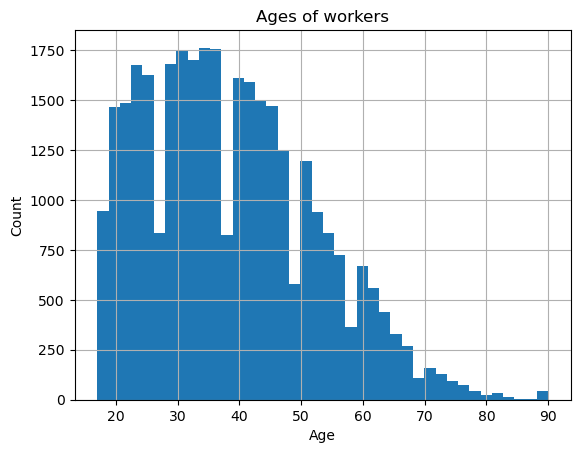

In [18]:
df.age.hist(histtype = 'stepfilled', bins = 40)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title('Ages of workers')

Recall that _df_ is our complete dataset, and _age_ is the column that gives the person's age.  Typing _df.age_ returns a Series containing these ages.

The _hist()_ method will divide the values in the Series into bins, then count the number of entries in each bin.  It then builds the chart.  This actually builds a chart in the _plt_ (MatPlotLib), which is drawn as part of the output of the cell.

Note that we added some extra calls to _plt_, indicating the strings to use to label the two axes of the chart and also to give a title for the chart.

We can actually plot two charts superimposed.  In the following diagram, we show the histograms of both the men and the women:

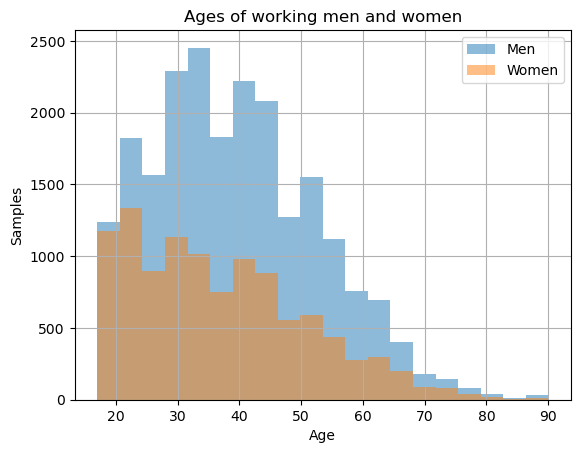

In [19]:
male.age.hist(histtype = 'stepfilled', alpha = 0.5, bins = 20, label='Men')
female.age.hist(histtype = 'stepfilled', alpha = 0.5, bins = 20, label='Women')
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title('Ages of working men and women')
plt.legend(loc='upper right')

Before we look at the data itself, let's spend a few minutes looking at some of the options that are available with histograms and the _plt_ tool.  This introduction will be brief, but will hopefully give you some insights into how the system can be used.

Note that we simply generate two (or more) histograms; they by default become part of the same diagram.

Also note in each of the histograms, we can give a Label.  This Label value is printed in the legend.

One of the calls to _plt_ indicates where the legend should be drawn.  There are several options available.  Pick a corner of the diagram that won't obscure the chart!

There are many additional options available, which allow you to do fine positioning of the elements.

The observant reader will see that we also assigned _alpha_ values to the two histograms.  Let's discover what these are for, first by removing those values:

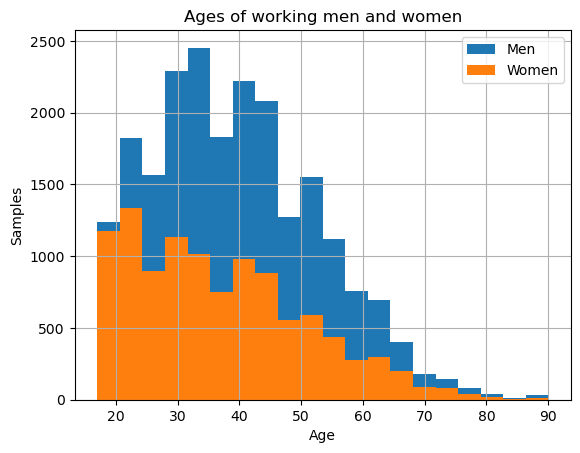

In [20]:
male.age.hist(histtype = 'stepfilled', bins = 20, label='Men')
female.age.hist(histtype = 'stepfilled', bins = 20, label='Women')
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title('Ages of working men and women')
plt.legend(loc='upper right')

The colors are a little more intense.  Before, with alpha setting, they were half-way transparent, so some of the underlying white showed through.  Without the alpha, the full-intensity colors are drawn.

Look what happens if we switch the order of the male and female plots:

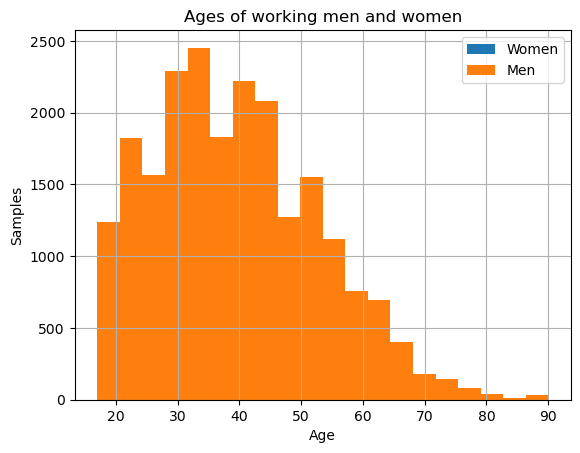

In [21]:
female.age.hist(histtype = 'stepfilled', bins = 20, label='Women')
male.age.hist(histtype = 'stepfilled', bins = 20, label='Men')
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title('Ages of working men and women')
plt.legend(loc='upper right')

What happened to the women?  The plot legend says they are still there, but they are gone!

The problem is that the woman's chart is completely covered by the men's chart.  We drew the women's graph first, then we overwrote this with the men's graph.  Because all of the colors we are drawing are solid colors, they completely block anything under them.  

Now look what happens if we put the alpha back (although we only have to add the alpha to the second and any later plots):

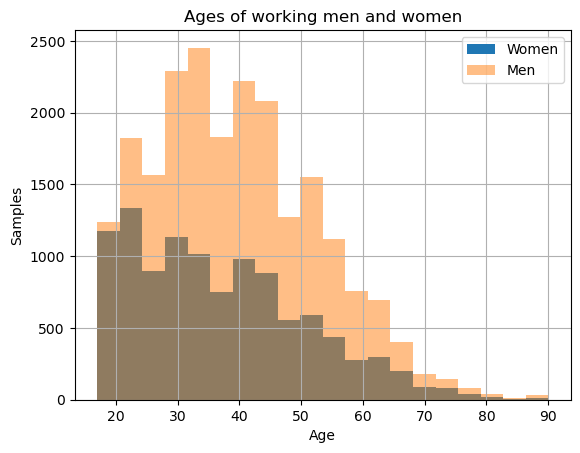

In [22]:
female.age.hist(histtype = 'stepfilled', bins = 20, label='Women')
male.age.hist(histtype = 'stepfilled', bins = 20, alpha = 0.5, label='Men')
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title('Ages of working men and women')
plt.legend(loc='upper right')

Now we can see both charts again.  The women graph, drawn first, is with solid colors.  The men graph, drawn second, has half-way transparent coloring (alpha = 0.5), so the color is partially transparent.  The women graph can show through.

An alpha value of 0.0 means that the color is completely transparent, so the chart drawn with this color would be invisible.  An alpha value of 1.0 is completely solid.  You can experiment with the various alpha values to get the graph appearing as you desire.

We can also draw a non-filled graph using 'step' rather than 'stepfilled'.  We might want to keep the alpha, just in case there is a bin where they have the same height.

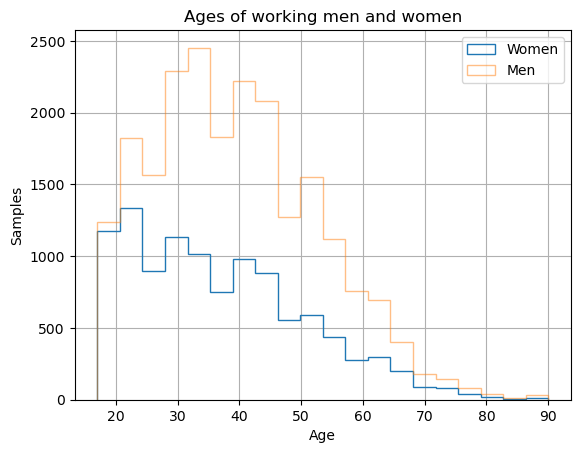

In [23]:
female.age.hist(histtype = 'step', bins = 20, label='Women')
male.age.hist(histtype = 'step', bins = 20, alpha = 0.5, label='Men')
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title('Ages of working men and women')
plt.legend(loc='upper right')

These charts give us some idea about the data.  

## Normalizing Charts: Probability Mass Functions

One thing that is pretty clear is that there are more men datapoints than women datapoints.  And these differences in the dataset sizes may obscure some important analysis results.

We can _normalize_ the charts.  

* When the data is normalized, the numbers are scaled so that the area under the curve is equal to '1'.  

* Another way to look at this, the values are all divided by the sum of all the values.

* A normalized graph is similar to looking at _percentages_ rather than actual values.

This is how the data looks when it is normalized:

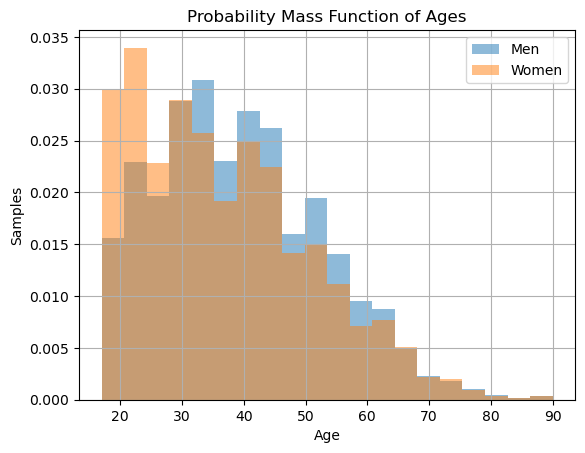

In [26]:
male.age.hist(density = True, histtype = 'stepfilled', bins = 20, alpha = 0.5, label='Men')
female.age.hist(density = True, histtype = 'stepfilled', bins = 20, alpha = 0.5, label='Women')
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title('Probability Mass Function of Ages')
plt.legend(loc='upper right')

We can see from this chart that of the women who responded to the study, a higher percentage of them were younger, and for men, a higher percentage were older.  And around age 30 was the turning point.

A normalized histogram is called a _Probability Mass Function_.

## Cumulative Distribution Function

Another way to look at this data is a _Cumulative Distribution Function_, which basically just sums up all of the values 'to the left' of your current position.  So the first bar just has its height.  The height of the second bar reflects its value plus the value of the first column.  The height of the third column is the sum of the values for the first three columns, and so forth.  With this graph, the height at coordinate _x_ represents the probability that the an element will have a value less than or equal to _x_.

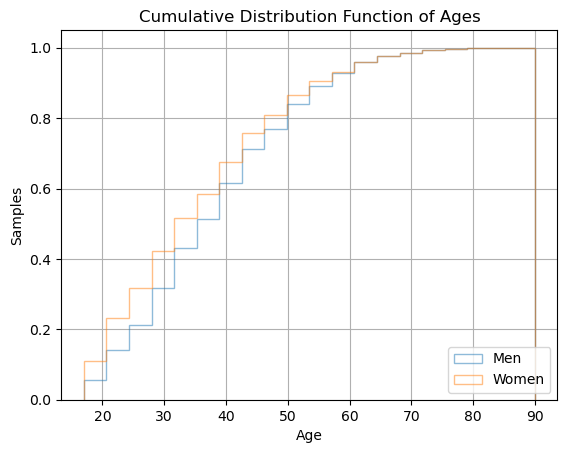

In [27]:
male.age.hist(density = True, histtype = 'step', bins = 20, alpha = 0.5, label='Men', cumulative = True)
female.age.hist(density = True, histtype = 'step', bins = 20, alpha = 0.5, label='Women', cumulative = True)
plt.xlabel("Age")
plt.ylabel("Samples")
plt.title('Cumulative Distribution Function of Ages')
plt.legend(loc='lower right')

This graph shows that for most ages, there is a higher percentage of women who reported at or below that age then men who reported.  Conversely, men tended to respond to this study at a greater age than women.

## Digression: Age vs Salary

At this point, a new thought occurred to me: How does higher salary correlate to age?  The discussion from the book so far was seeking to find a correlation between sex and salary, but I was curious about the correlation between age and salary.

To do this, I wanted to draw a graph that showed, for any age group, what percentage of responders had high income?
So I need a way to make a DataFrame where the indicies are the ages and the values are the percentage of entries in that age category that are high-income.

We can get Pandas to group data by age, and it can then aggregate the information.

In the following cell, we group the data by age, then print out one of the resulting groups:

In [31]:
group = df.groupby('age')
group.get_group(30)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K\n
33,30,Federal-gov,59951,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K\n
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K\n
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K\n
88,30,Private,54334,9th,5,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32456,30,Self-emp-not-inc,261943,11th,7,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,0,0,30,Honduras,<=50K\n
32516,30,Private,176175,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,Female,0,0,24,United-States,<=50K\n
32523,30,Private,77266,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,55,United-States,<=50K\n
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K\n


We can apply an aggregation function that runs over all of the entries in a group, then returns a single value for the group.  The aggregation has to be performed on a numeric column, so why don't we use the _hr_per_week_ and look at the average (mean) value?

In [32]:
test = group.aggregate(np.mean)
test

TypeError: Could not convert ?PrivatePrivatePrivatePrivatePrivatePrivate??PrivatePrivatePrivate?Self-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivate??Private?PrivateLocal-govPrivatePrivatePrivate??Self-emp-not-inc?PrivatePrivatePrivatePrivatePrivate?PrivateLocal-gov?PrivateSelf-emp-incPrivate?PrivatePrivatePrivatePrivate?Local-govPrivatePrivatePrivatePrivatePrivate?Local-govPrivate?PrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivate?PrivatePrivatePrivateState-govPrivatePrivatePrivatePrivatePrivatePrivatePrivate?Local-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivatePrivatePrivatePrivate?PrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivate?PrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateSelf-emp-not-incPrivate?PrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivate??PrivatePrivatePrivateSelf-emp-not-incPrivatePrivatePrivatePrivateState-govPrivatePrivatePrivatePrivateSelf-emp-incPrivatePrivateSelf-emp-incPrivate?PrivateNever-workedPrivateSelf-emp-incPrivatePrivate?PrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivate?Private?Private?PrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivate?Self-emp-incPrivateLocal-govPrivate?PrivatePrivatePrivateSelf-emp-incPrivatePrivate?PrivatePrivatePrivatePrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivate??PrivatePrivatePrivatePrivatePrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivatePrivate?PrivatePrivatePrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivateLocal-govLocal-govLocal-gov?Private?PrivatePrivatePrivate??PrivatePrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivate??PrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivate?PrivatePrivate?Private?PrivateLocal-govPrivateSelf-emp-not-incPrivate?PrivatePrivatePrivatePrivatePrivatePrivateFederal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivate?PrivatePrivatePrivatePrivate?PrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivateLocal-govPrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivatePrivate??PrivatePrivate???PrivatePrivate?PrivatePrivatePrivateLocal-govPrivatePrivate??PrivatePrivatePrivatePrivate??PrivatePrivatePrivatePrivate to numeric

The aggregation functions are things like min, max, sum, average, count, and so on.  But these all work on numbers, and our high-income indication is a column that has text values.

So the first step will be to add a new column to the data that has a '1' for high-income and a '0' for low income.

Once we have numbers, then what aggregation do we use to determine the percentage of highs?  It took a while, but then became clear, this is simply the mean value of 'high_income' for the group.  Then, to really make this a percentage, scale the number by 100.

_Alternatively, rather than using values of 0 and 1 in the high_income column, then later scale by 100, we can just use values of 0 and 100 in that column, which is what I did._

Another issue is that we don't want to do this for each age, but each 'bucket of age'.  In the bar graph, we used 20 bins, so about 5 years per bin.  So let's make another column, the 'age_bin' column, where all ages from 20-24 will use value '22'.

That's the plan, now to accomplish the plan.

To not mess up our main flow, for this digression I will make a copy of the DataFrame, then add a new column to it:

In [33]:
tempset = df.copy()  # copy the data
tempset['high_income'] = 100*(tempset.income == '>50K\n').astype(int)  # make new 'high-income' column
tempset['age_bin'] = tempset.age - tempset.age % 5 + 2  # make new 'age-bin' column
tempset.tail()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income,high_income,age_bin
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n,0,27
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n,100,42
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n,0,57
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n,0,22
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K\n,100,52


Looking at the right end of the chart, we can see the new columns we added, and we can spot-check to see of the code worked.  It appears to have worked!

We can now examine just the _age_bin_ and _high_income_ columns, then group the data by _age_bin_.  This makes a nested set of values where the outer set is the age_bin and the inner set is the _high_income_ values for all of the people in that set.

We can then call the _mean()_ function on that grouping.  This will collapse the inner sets, giving the mean value of each of those sets!  After doing this grouping, we print out the results.

In [34]:
group = tempset[['age_bin', 'high_income']].groupby('age_bin').mean()
group

,high_income
age_bin,
17,0.120700
22,1.507795
27,10.866940
32,22.521899
37,31.157895
42,35.371517
47,39.133071
52,41.386061
57,34.871245


The first (and last) bins are pretty much outliers, so let's look at a few other bins.

* The 22 bin has the value 1.507795, indicating that about 1.5% of the people in the age range from 20 to 24 have high income.

* The 52 bin shows that about 41% of the people in the age range 50 to 54 have high income.

Looking at the numbers is interesting, and it is important to have this data for when we want to dig deeper, but it is hard to draw conclusions just by seeing the numbers.  So let's draw a plot of this distribution:

Text(0.5, 1.0, 'Probability of High-Income by Age')

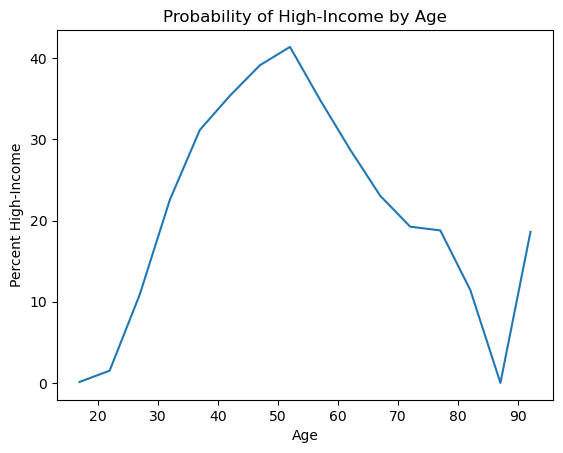

In [35]:
plt.plot(group)
plt.xlabel("Age")
plt.ylabel("Percent High-Income")
plt.title('Probability of High-Income by Age')

Now this is interesting!  It shows that there is a very dramatic correlation between age and high-income!  Below about 20 or 30, there is a low percentage of people having high income, but that the probability is much higher above that.  Which is not surprising.  It takes a while to be promoted, to reach a higher salary.

What do we make of the drop in salary as age increases past 55?  We don't really know, we haven't dug deep enough.  Some thoughts come to mind:

* People tend to retire around 65, so fewer people are working after that point.

* For people with really low salaries, maybe they can't afford to retire?

* Maybe the people who worked hard when they were younger, to get the higher salaries, died younger?

These ideas may prompt us to pursue new avenues of investigation.

Recall from our earlier graph: A higher percentage of women respondents than men respondents were less than 30 years old.  A higher percentage of men respondents than women respondents were more than 30 years old.  

This graph shows that there was a higher percentage of respondents with high income above age 30 than below age 30.

Combining these two results indicates that maybe the correlation is not between sex and wage but between age and wage.  Something to consider.


## Digression: Education vs Salary

Another thought that came to mind: Maybe the salary depends upon the level of education.  Actually, I kind of hope so, because otherwise you will all leave and I will be without a job!

For this analysis, we want to group the data by the educational level, then compute statistics and make some charts and graphs.

The problem is that if we are grouping by the 'education' field, the groups will come out sorted alphabetically, not sorted by years of education (for example).  But looking at the dataset, we see there is a column labeled 'education_num', and this appears to be numeric and in order, so we will group by that.

For this analysis, I will make four Series.  One for Female/High income, and the others are similar.  We take these complete sets, group them by 'education_num', then aggregate each set by asking for the size.  This will give us the count of elements (people) in each of the education_num categories.

Finally, we will assemble the four Series into one Dataframe.

In [36]:
fhe = female_high.groupby('education_num').size()
fle = female_low.groupby('education_num').size()
mhe = male_high.groupby('education_num').size()
mle = male_low.groupby('education_num').size()
edu = pd.DataFrame({'FemaleHigh': fhe, 'FemaleLow': fle, 'MaleHigh': mhe, 'MaleLow': mle})
edu

,FemaleHigh,FemaleLow,MaleHigh,MaleLow
education_num,,,,
1,NaN,16,NaN,35
2,NaN,46,6.0,116
3,2.0,82,14.0,235
4,1.0,159,39.0,447
5,5.0,139,22.0,348
6,3.0,292,59.0,579
7,8.0,424,52.0,691
8,4.0,140,29.0,260
9,226.0,3164,1449.0,5662


While those printouts look interesting, a graph might be a lot more informative:

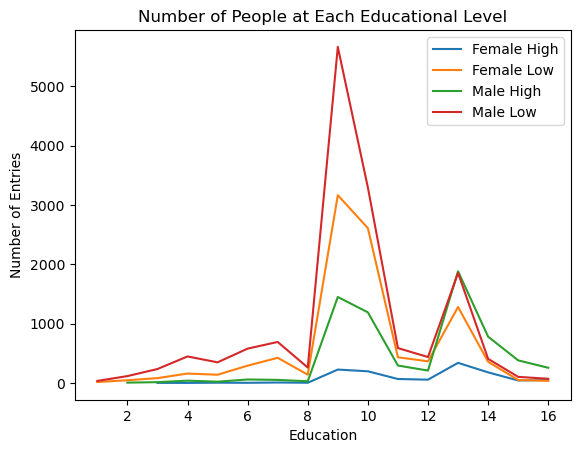

In [37]:
plt.plot(edu.FemaleHigh, label = 'Female High')
plt.plot(edu.FemaleLow, label = 'Female Low')
plt.plot(edu.MaleHigh, label = 'Male High')
plt.plot(edu.MaleLow, label = 'Male Low')
plt.xlabel("Education")
plt.ylabel("Number of Entries")
plt.title('Number of People at Each Educational Level')
plt.legend(loc='upper right')

This is interesting, we can see some pretty obvious spikes, one around 9 and the other around 13.  We have no idea what these educational levels mean, they are just numbers.  So the first thing we want to do is find out that these education_num values mean.

The second thing is that the spikes look very obvious for lower-income males, but not very obvious for high-income females.  The other two groups are in the middle range.  So let's look at this too.

First, how are we going to determine the mapping of education_num to education, which is a more meaningful string.  On one hand, we can simply scan through the dataset, looking for sample values, and writing (by hand) a little chart.  But why own a dog, then bark for ourselves?  We have a computer, lets get it to do the work.

How will we go about this?

Let's make a new DataFrame that just contains the 'education' and 'education_num' values.  This will still have 32,000 entries, but it will only have the two columns we are interested in.

We could group this by 'education_num'.  This will give us a group for each numeric value, and within each group will be a set entries, all having the same 'education' string.  We can't do much to aggregate that, since the value is a string.

Alternatively, we can group this by 'education'.  This will give us a group for each string value, and within each group will be a set of entries, all having the same 'education_num' value.  We can then aggregate this by using max(), min(), or mean() (since all of the values are the same.

The result will be a DataFrame with just 16 entries, each having the 'education' value and its matching 'education_num'.

The last thing we need to do is sort the list.  Otherwise it will be sorted alphabetically by 'education' name.  So let's sort by the 'education_num'.  We can then print the resulting chart.

In [38]:
set1 = df[['education', 'education_num']].groupby('education').max()
set1.sort_values(by = 'education_num', ascending = True, inplace = True)
set1

,education_num
education,
Preschool,1
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
10th,6
11th,7
12th,8
HS-grad,9


Recall that the biggest spike was at 9, which corresponds to high school graduate.  There is a second spike at 13, which is Bachelor's degree.  And actually, there is another spike, greater than the Bachelor's degree, at 10 (some college).  The 10 spike is adjacent to the 9 spike, so it blended in.

So we've learned the more popular educational levels, which is probably pretty much what we expect.

Our next task is to normalize the data.  This will help pull out the trends.  Right now what overwhelms the report is the sheer number of entries.  But we might not be concerned about the _number of people_ at a certain level, but rather the _percentage of people_ at that level.

Also, rather than overwriting our current columns in the DataFrame, we will make new columns.  In the following, we make a new column by taking an old column, dividing each entry by the sum of that column, then multiply by 100:

In [39]:
edu['FHNorm'] = 100 * edu.FemaleHigh / edu.FemaleHigh.sum()
edu['FLNorm'] = 100 * edu.FemaleLow / edu.FemaleLow.sum()
edu['MHNorm'] = 100 * edu.MaleHigh / edu.MaleHigh.sum()
edu['MLNorm'] = 100 * edu.MaleLow / edu.MaleLow.sum()
edu

,FemaleHigh,FemaleLow,MaleHigh,MaleLow,FHNorm,FLNorm,MHNorm,MLNorm
education_num,,,,,,,,
1,NaN,16,NaN,35,NaN,0.166806,NaN,0.231359
2,NaN,46,6.0,116,NaN,0.479566,0.090063,0.766790
3,2.0,82,14.0,235,0.169635,0.854879,0.210147,1.553411
4,1.0,159,39.0,447,0.084818,1.657631,0.585410,2.954786
5,5.0,139,22.0,348,0.424088,1.449124,0.330231,2.300370
6,3.0,292,59.0,579,0.254453,3.044204,0.885620,3.827340
7,8.0,424,52.0,691,0.678541,4.420350,0.780546,4.567689
8,4.0,140,29.0,260,0.339271,1.459550,0.435305,1.718667
9,226.0,3164,1449.0,5662,19.168787,32.985822,21.750225,37.427287


Now we can plot the new columns:

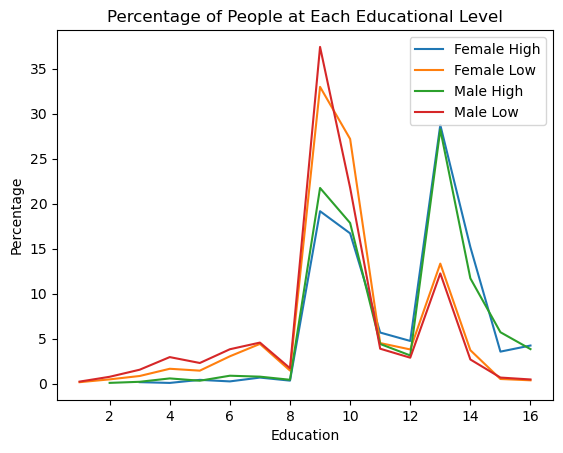

In [40]:
plt.plot(edu.FHNorm, label = 'Female High')
plt.plot(edu.FLNorm, label = 'Female Low')
plt.plot(edu.MHNorm, label = 'Male High')
plt.plot(edu.MLNorm, label = 'Male Low')
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.title('Percentage of People at Each Educational Level')
plt.legend(loc='upper right')

Ah, this is very interesting.  We notice that there is not much difference between males and females.

However, we see that at the high-school spike and below, there is a higher percentage of low-income people, and from the Bachelor's spike and above, there is a higher percentage of high-income people.

This is great news!  It seems like my job is secure, and you will be hanging around!

Let's make one more graph!  Earlier we made a graph giving the probability of high-income based on age.  We can reuse and tweek that code to instead graph the probability of high-income based on educational level:

Text(0.5, 1.0, 'Probability of High-Income by Education')

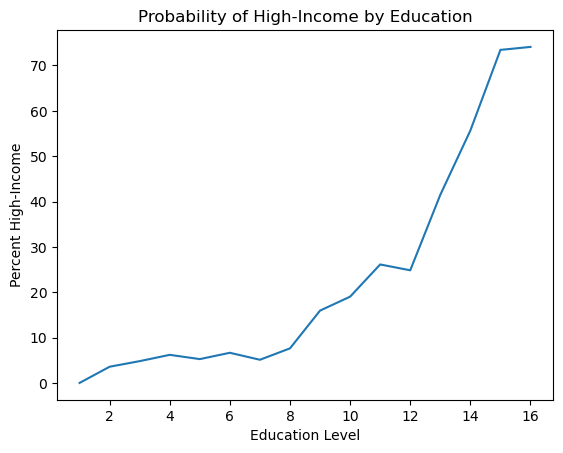

In [41]:
group = tempset[['education_num', 'high_income']].groupby('education_num').mean()
plt.plot(group)
plt.xlabel("Education Level")
plt.ylabel("Percent High-Income")
plt.title('Probability of High-Income by Education')

This should be on Cal Poly's website!

## Undigression

OK, enough of these side-trips.  Let's return to the book.  There are a few more things to cover in this chapter.

And actually, there are some things in the book that I won't cover...

## Outlier Treatment

Outliers are data samples with a value that is far from the central tendency.  Perhaps the value is far from the median, or the value is further from the mean than 2 or 3 standard deviations.

In this dataset, we have some values at age 17, and some at 90.  These extreme values are probably not representative of the population as a whole, and maybe are a result of data entry errors.  Based on our knowledge of the domain, we may conclude that from the median of 37, we will go down to about 22 and up to about 72 years old.

In [42]:
def filter_outliers(set):
    return set[(set.age >= 22) & (set.age <= 72)]

male_filter = filter_outliers(male)
female_filter = filter_outliers(female)
male_high_filter = filter_outliers(male_high)
female_high_filter = filter_outliers(female_high)
male_low_filter = filter_outliers(male_low)
female_low_filter = filter_outliers(female_low)
all_high_filter = filter_outliers(all_high)
all_low_filter = filter_outliers(all_low)
df_filter = filter_outliers(df)

male_filter.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week
count,19891.000000,1.989100e+04,19891.000000,19891.000000,19891.000000,19891.000000
mean,40.553517,1.911008e+05,10.240461,1422.156252,104.940274,43.490976
std,11.846848,1.065111e+05,2.666072,8629.237853,439.451271,11.416660
min,22.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.178685e+05,9.000000,0.000000,0.000000,40.000000
50%,39.000000,1.794880e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.397315e+05,13.000000,0.000000,0.000000,50.000000
max,72.000000,1.455435e+06,16.000000,99999.000000,3770.000000,99.000000


We can see in the description of the filtered male data that the minimum age is 22 and the maximum is 72, and that we still have 19,891 entries.  It looks like we have successfully removed the outliers.

We can now run the statistic routine that we ran earlier.  In the following, I run the old sets followed by the filtered sets, so we can see how the values may or may not have changed.

In [43]:
print_rate('men with high income', male_high, male)
print_rate('filtered men with high income', male_high_filter, male_filter)
print_rate('women with high income', female_high, female)
print_rate('filtered women with high income', female_high_filter, female_filter)

print_stats('men', male)
print_stats('filtered men', male_filter)
print_stats('women', female)
print_stats('filtered women', female_filter)
print_stats('high-income men', male_high)
print_stats('filtered high-income men', male_high_filter)
print_stats('high-income women', female_high)
print_stats('filtered high-income women', female_high_filter)
print_stats('low-income men', male_low)
print_stats('filtered low-income men', male_low_filter)
print_stats('low-income women', female_low)
print_stats('filtered low-income women', female_low_filter)

print_median('men and women', male, female)
print_median('filtered men and women', male_filter, female_filter)
print_median('men and women with high-income', male_high, female_high)
print_median('filtered men and women with high-income', male_high_filter, female_high_filter)
print_median('men and women with low-income', male_low, female_low)
print_median('filtered men and women with low-income', male_low_filter, female_low_filter)

The rate of men with high income is: 30%.
The rate of filtered men with high income is: 33%.
The rate of women with high income is: 10%.
The rate of filtered women with high income is: 12%.
Statistics of age for men: mu: 39.43, var: 178.77, std: 13.37
Statistics of age for filtered men: mu: 40.55, var: 140.35, std: 11.85
Statistics of age for women: mu: 36.86, var: 196.38, std: 14.01
Statistics of age for filtered women: mu: 39.17, var: 150.41, std: 12.26
Statistics of age for high-income men: mu: 44.63, var: 109.95, std: 10.49
Statistics of age for filtered high-income men: mu: 44.33, var: 100.25, std: 10.01
Statistics of age for high-income women: mu: 42.13, var: 109.41, std: 10.46
Statistics of age for filtered high-income women: mu: 41.93, var: 99.79, std: 9.99
Statistics of age for low-income men: mu: 37.15, var: 191.99, std: 13.86
Statistics of age for filtered low-income men: mu: 38.68, var: 149.70, std: 12.24
Statistics of age for low-income women: mu: 36.21, var: 203.26, std: 

We see that not of the statistics changed dramatically.  However we see in many of the statistics, comparing males and females got a little closer together.

We can plot one of the sets, both with and without the outliers, so get a visual about the number of values that were dropped.  I used one of the smaller sets: With a bigger sets the plots were a lot denser!

<Axes: >

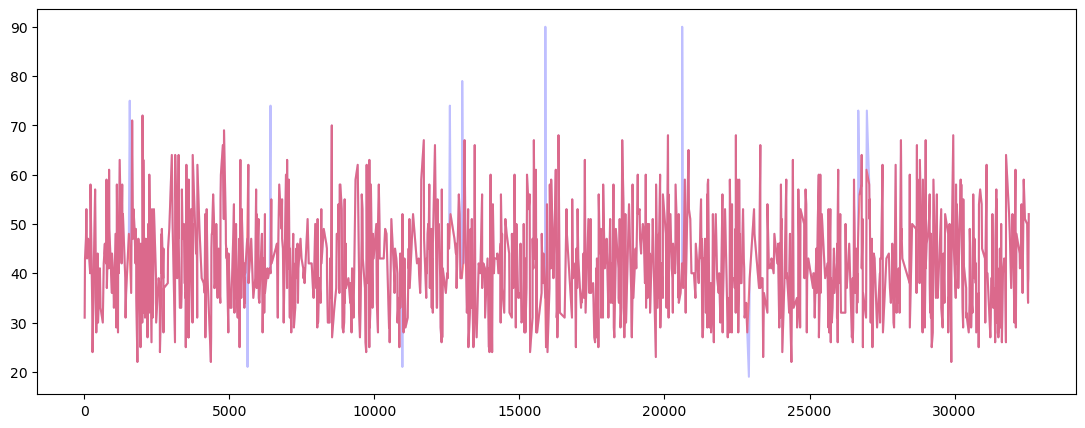

In [44]:
plt.figure(figsize = (13.4, 5))
female_high.age.plot(alpha = .25, color = 'blue')
female_high_filter.age.plot(alpha = .45, color = 'red')

## Measuring Asymmetry: Skewness and Pearson's Median Skewness Coefficient

Sometimes we want to see if the data is _skewed_.  If a distribution is skewed, the data stretches further from the mean in one direction or the other.  A negative skew means that values below the mean tend to be further from the mean while values above the mean tend to be closer to the mean.

The formula for skew is:

$$ g_1 = \frac{1}{n} \frac{\sum_{i} (x_i - \mu^3)}{\sigma^3} $$

If the distribution is normal, the skew would be zero.

Note that skewness can be affected by outliers!  A simpler indication of this is to compare the mean and the median.

In [45]:
def skewness(x, label):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i - m) * (i - m) * (i - m)
    res /= (len(x) * s * s * s)
    print(f'Skewness of the {label} population = {res}')
    
skewness(male_high.age, 'male')
skewness(male_high_filter.age, 'filtered male')
skewness(female_high.age, 'female')
skewness(female_high_filter.age, 'filtered female')


Skewness of the male population = 0.4640375195255478
Skewness of the filtered male population = 0.2692767474998042
Skewness of the female population = 0.5915710255736905
Skewness of the filtered female population = 0.4021179824911583


Notice that these are a bit skewed, but that the filtered versions display less skewness.

The **Pearson's median skewness coefficient** is a more robust alternative to the skewness coefficient, and is defined as follows:

$$ g_p = 3(\mu - \mu_{12}) \sigma $$

There are many other definitions of skewness that statisticians use, but we won't discuss them!

Here shows the Pearson's coefficient for men and women:

In [46]:
def pearson(x, label):
    s = 3 * (x.mean() - x.median()) * x.std()
    print(f"Pearson's coefficient of the {label} population = {s}")
    
pearson(male_high_filter.age, "male")
pearson(female_high_filter.age, "female")

Pearson's coefficient of the male population = 9.772577960962293
Pearson's coefficient of the female population = 27.941592718142346


The book has several additional methods and statistics that it presents, but we have covered most of the examples.